In [1]:
import json
import pandas as pd
# Opening JSON file
f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)
print(df.head())

         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [2]:
print(df.columns)

Index(['id', 'name', 'shortTitle', 'text', 'teaser', 'shortTeaser', 'kicker',
       'regions', 'keywords', 'keywordStrings', 'thematicFocusCategory',
       'navigations', 'categories', 'departments', 'firstPublicationDate',
       'lastModifiedDate', 'contentDate', 'relatedAutoTopics', 'contentLinks',
       'articles', 'isOpinion', 'geographicLocations', 'contentAssociations',
       'mainContentImageLink', 'images', 'externalLinks', 'topStory',
       'language'],
      dtype='object')


In [3]:
df['firstPublicationDate'].isnull().sum()

133589

In [4]:
df.shape

(175659, 28)

In [5]:
sum(df['firstPublicationDate'].apply(lambda x: x is None))

133589

In [6]:
df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

In [7]:
df['cleanRegions'] = df['regions'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)

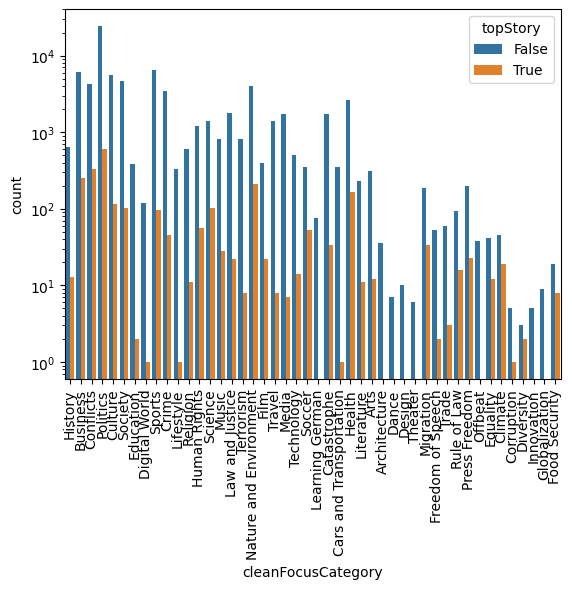

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='cleanFocusCategory', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

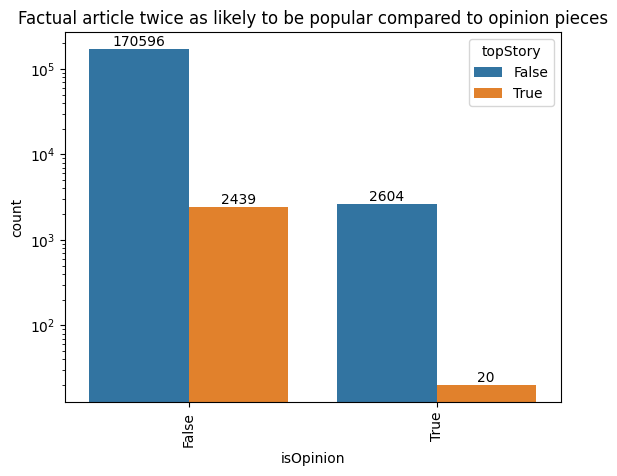

In [9]:
ax = sns.countplot(x='isOpinion', hue='topStory', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Factual article twice as likely to be popular compared to opinion pieces')
plt.show()

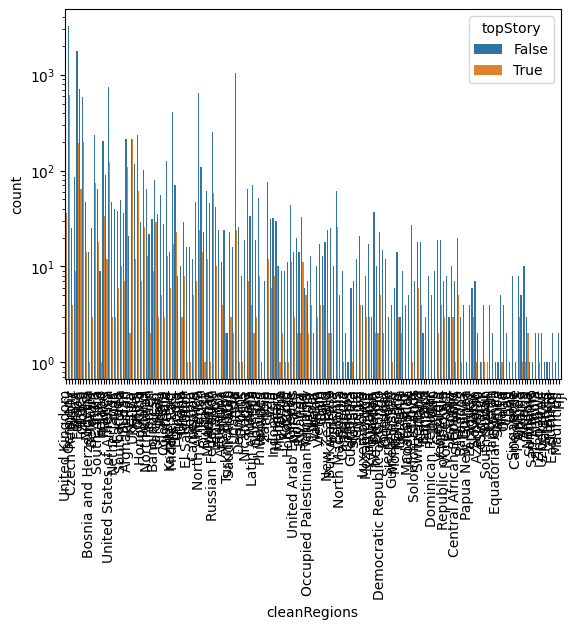

In [10]:
sns.countplot(x='cleanRegions', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [11]:
df['firstContentAssociations'] = df['contentAssociations'].apply(lambda x: x[0]['id'] if len(x) != 0 else None)
df['secondContentAssociations'] = df['contentAssociations'].apply(lambda x: x[1]['id'] if len(x) > 1 else None)
df['thirdContentAssociations'] = df['contentAssociations'].apply(lambda x: x[2]['id'] if len(x) > 2 else None)
df['fourthContentAssociations'] = df['contentAssociations'].apply(lambda x: x[3]['id'] if len(x) > 3 else None)

In [12]:
print(df['id'].isin(df['firstContentAssociations']).sum())
print(df['id'].isin(df['secondContentAssociations']).sum())
print(df['id'].isin(df['thirdContentAssociations']).sum())
print(df['id'].isin(df['fourthContentAssociations']).sum())

246
252
239
228


In [13]:
df[df['id'].isin(df['firstContentAssociations'])]

,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,keywordStrings,...,images,externalLinks,topStory,language,cleanFocusCategory,cleanRegions,firstContentAssociations,secondContentAssociations,thirdContentAssociations,fourthContentAssociations
37992,38713827,How to sit on burning tires,How to sit on burning tires,"<div class=""vjs-wrapper embed big ""><h2 aria-l...",An activist in Niger is creating jobs for loca...,An activist in Niger is creating jobs for loca...,None,[],"[{'name': 'eco@africa'}, {'name': 'environment...","[eco@africa, environment, used tires, Niger, N...",...,[{'name': 'Lagerung von alten Autoreifen in Ma...,[],False,None,Nature and Environment,None,40340621,40340622.0,40340623.0,40340624.0
38183,38760066,Reports: Obama warned Trump about Flynn's Russ...,Obama warned Trump about Flynn,"<div class=""vjs-wrapper embed big ""><h2 aria-l...",Former President Barack Obama warned Donald Tr...,Former President Barack Obama reportedly warne...,United States,[],"[{'name': 'Barack Obama'}, {'name': 'Donald Tr...","[Barack Obama, Donald Trump, Vladimir Putin, M...",...,"[{'name': 'Michael Flynn'}, {'name': 'USA Stel...",[],False,None,Politics,None,40379530,40379542.0,40379544.0,40379531.0
38557,38839913,Touring Lübeck in an amphibious bus,Touring Lübeck in an amphibious bus,"<p><span class=""placeholder"" data-type=""VIDEO""...",Take a splash tour in a bus! There's a new tou...,"First view the city gate, then drive into the ...",,[],"[{'name': 'amphibious bus'}, {'name': 'Splash-...","[amphibious bus, Splash-Bus, splash tours, cit...",...,[{'name': 'DW Euromaxx Wasserbus'}],[],False,None,Culture,None,40450829,40450831.0,40450832.0,40450830.0
39271,38982608,German Cup Final: Varela tattoo farce disrupts...,German Cup Final: Varela tattoo farce disrupts...,<p>Eintracht Frankfurt have told defender Guil...,The Uruguayan on loan to Frankfurt has returne...,The Uruguayan cannot play after inking gets in...,None,[],"[{'name': 'German Cup'}, {'name': 'German Cup ...","[German Cup, German Cup final, Borussia Dortmu...",...,[{'name': 'Eintracht Frankfurt - Guillermo Var...,[],False,None,Soccer,None,40577868,40577869.0,40577870.0,40577871.0
39333,38999939,Cyber-insurance market bound to explode,Cyber-insurance market to explode,"<p>The European <a href=""/en/cybercrime-just-t...",The insurance market minimizing customers' los...,The insurance market minimizing customers' los...,,[],"[{'name': 'Cyberattack'}, {'name': 'cybersecur...","[Cyberattack, cybersecurity, insurance, Allian...",...,[{'name': 'Symbolbild Internet Sicherheit Kont...,[],False,None,Business,None,40593286,40593809.0,40593810.0,40593287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172519,60263228,Snowstorms snag travel in Japan,Snowstorms snag travel in Japan,"<p>Heavy snow hit parts of central <a href=""/e...",Heavy snowfall has caused travel chaos and bro...,Heavy snowfall has caused travel chaos and bro...,,[{'name': 'Japan'}],"[{'name': 'Japan'}, {'name': 'snowstorm'}, {'n...","[Japan, snowstorm, blizzard, Sea of Japan]",...,[{'name': 'Japan Tottori City starke Schneefäl...,[],False,ENGLISH,Climate,Japan,59518823,59518911.0,59518913.0,59518914.0
172543,60268132,"Europe's oldest polar bear, Katjuscha, passes ...",Europe's oldest polar bear passes away at Berl...,"<p><a href=""/en/germanys-oldest-zoo-turns-175/...",Berlin Zoo bids farewell to Katjuscha the pola...,Berlin Zoo bids farewell to Katjuscha the pola...,,[{'name': 'Germany'}],"[{'name': 'polar bear'}, {'name': 'Katjuscha'}...","[polar bear, Katjuscha, Berlin Zoo, Knut]",...,"[{'name': 'Berlin | Eisbärin Katjuscha'}, {'na...",[],False,ENGLISH,Nature and Environment,Germany,59525354,59525555.0,59525557.0,59525558.0
172545,60268712,"Edward O. Wilson, leading US biologist, dies a...",US biologist Edward O. Wilson dies at 92,"<p>Edward O. Wilson, the sometimes-controversi...",The two-time Pulitzer Prize winner wrote more ...,The two-time Pulitze

In [14]:
df.loc[df['id']==38713827,['id','teaser','contentAssociations']]

,id,teaser,contentAssociations
37992,38713827,An activist in Niger is creating jobs for loca...,"[{'id': 40340621}, {'id': 40340622}, {'id': 40..."


In [15]:
df.loc[df['id']==40340621,['id','teaser','contentAssociations']]

,id,teaser,contentAssociations
139595,40340621,Germany's Philipp Kohlschreiber breezed past J...,"[{'id': 41762019}, {'id': 41762020}, {'id': 41..."


#### Issue with contentAssociations
- Niger story (id = 38713827) associated to story on tennis

In [16]:
df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)

In [17]:
df['cleanLastModifiedDate'] = pd.to_datetime(df['lastModifiedDate'])

In [18]:
#df['cleanLastModifiedDay'] = df['cleanLastModifiedDate'].dt.strftime('%d')

In [19]:
#df['cleanLastModifiedDay'].head()

In [20]:
test = df.loc[df['firstKeyword'] == 'Turkey','id'].groupby(df["cleanLastModifiedDate"].dt.year).count()

<AxesSubplot:xlabel='cleanLastModifiedDate', ylabel='id'>

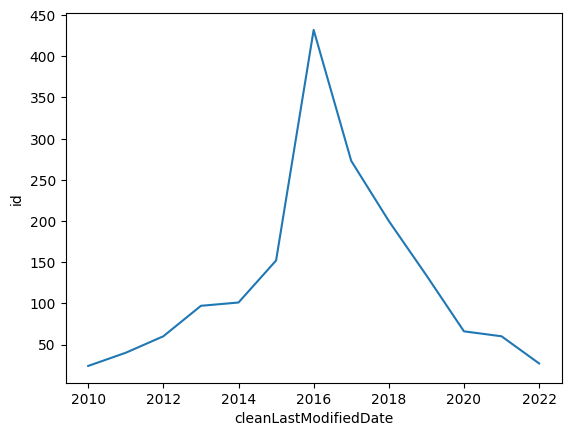

In [21]:
sns.lineplot(data=test)

<AxesSubplot:xlabel='cleanLastModifiedDate'>

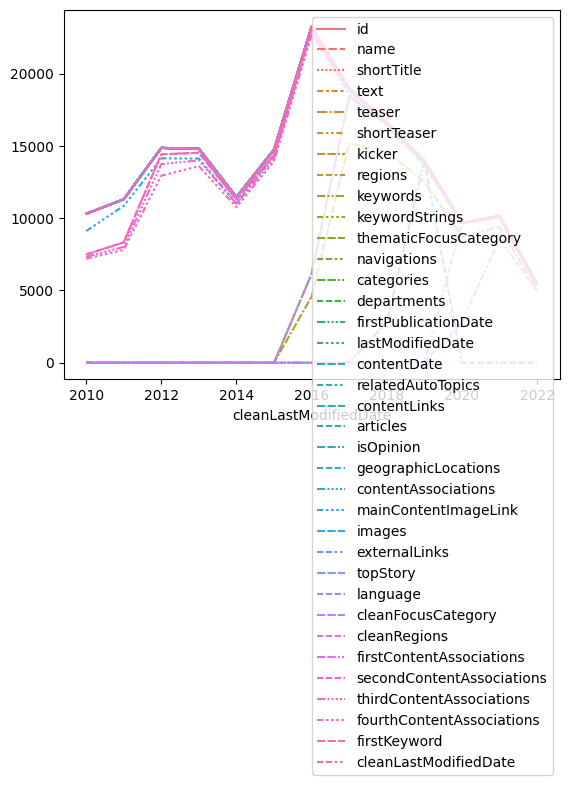

In [22]:
test2 = df.groupby(df["cleanLastModifiedDate"].dt.year).count()
sns.lineplot(data=test2)

In [23]:
test2.head()

,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,keywordStrings,...,topStory,language,cleanFocusCategory,cleanRegions,firstContentAssociations,secondContentAssociations,thirdContentAssociations,fourthContentAssociations,firstKeyword,cleanLastModifiedDate
cleanLastModifiedDate,,,,,,,,,,,,,,,,,,,,,
2010,10307,10307,10307,10307,10307,10307,0,10307,10307,10307,...,10307,0,0,0,10307,7494,7329,7196,7493,10307
2011,11312,11312,11312,11312,11312,11312,0,11312,11312,11312,...,11312,0,0,0,11312,8336,8016,7813,8326,11312
2012,14869,14869,14869,14869,14869,14869,0,14869,14869,14869,...,14869,0,1,0,14869,14426,13750,12946,14426,14869
2013,14814,14814,14814,14814,14814,14814,0,14814,14814,14814,...,14814,0,0,0,14814,14534,14009,13608,14533,14814
2014,11467,11467,11467,11467,11467,11467,0,11467,11467,11467,...,11467,0,1,0,11467,11278,11004,10765,11277,11467


In [24]:
test3 = df.copy()

In [25]:
test3.set_index('cleanLastModifiedDate', inplace = True)

Text(0.5, 1.0, 'Number of first keyword per month')

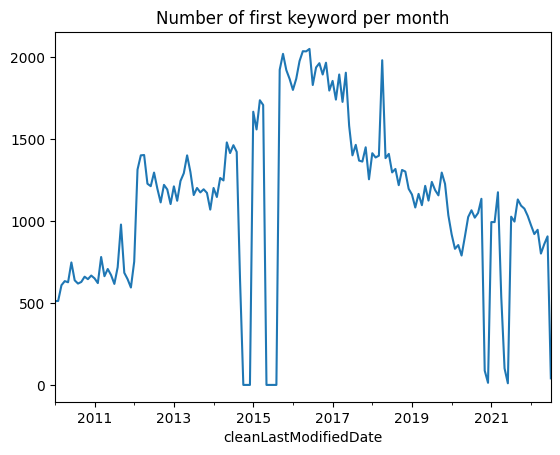

In [26]:
test3.resample('1M').count()['firstKeyword'].plot()
plt.title('Number of first keyword per month')

Text(0.5, 1.0, 'Number of articles per year')

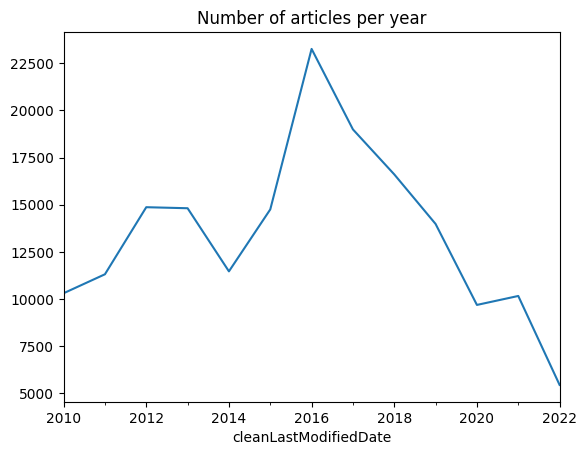

In [27]:
test3.resample('1Y').count()['id'].plot()
plt.title('Number of articles per year')

<AxesSubplot:xlabel='cleanLastModifiedDate'>

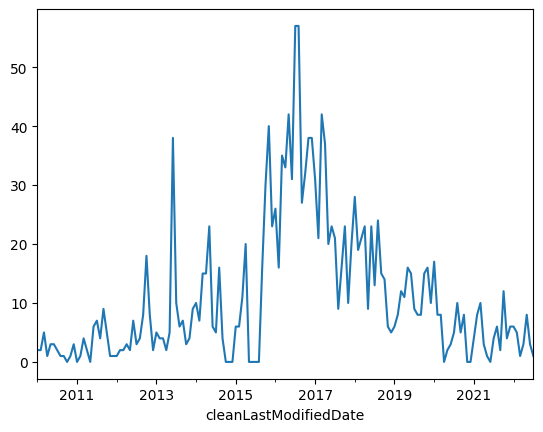

In [28]:
test3[test3['firstKeyword'] == 'Turkey'].resample('1M').count()['firstKeyword'].plot()

In [29]:
df['cleanGeographicLocations'] = df['geographicLocations'].apply(lambda x: x if bool(x) else None)

In [30]:
df.loc[df['cleanGeographicLocations'].notnull(),['name','regions','cleanGeographicLocations']]

,name,regions,cleanGeographicLocations
65,Dusseldorf – with a Tourist from Italy,[],"[{'name': 'Düsseldorf, Deutschland'}]"
66,Eisenhüttenstadt – Three Travel Tips,[],"[{'name': 'Eisenhüttenstadt, Deutschland'}]"
67,Eisenhüttenstadt – Architecture and Industrial...,[],"[{'name': 'Eisenhüttenstadt, Deutschland'}]"
187,Eisenhüttenstadt a mix of architecture and ind...,[],"[{'name': 'Eisenhüttenstadt, Deutschland'}]"
189,Francisco Javier from Spain,[],[{'name': 'Área Metropolitalitana y Corredor d...
...,...,...,...
132574,Brighton by the sea,[],"[{'name': 'Brighton, Vereinigtes Königreich'}]"
132859,Ethiopia’s Spice Girls,[],"[{'name': 'Addis Abeba, Äthiopien'}]"
134632,Extra Tour: Chartreuse,[],"[{'name': 'Le Sappey-en-Chartreuse, Frankreich'}]"
139793,Young Indians tackle growing garbage problem,[],"[{'name': 'Kirlapal - Dabal VP, Indien'}]"


In [31]:
df.loc[df['cleanRegions'].notnull(),['name','regions','cleanGeographicLocations']]

,name,regions,cleanGeographicLocations
71592,"Opinion: Brexit once again, with feeling","[{'name': 'United Kingdom'}, {'name': 'Europe'}]",None
71593,Brazilian photographer Sebastiao Salgado wins ...,"[{'name': 'Germany'}, {'name': 'Brazil'}]",None
71595,From imprisoned dissident to president: Vaclav...,"[{'name': 'Czech Republic'}, {'name': 'Europe'}]",None
71603,Confessions of German art dealer Helge Achenbach,[{'name': 'Germany'}],None
71604,What Brexit uncertainty means for Scottish pub...,"[{'name': 'United Kingdom'}, {'name': 'Europe'}]",None
...,...,...,...
175654,"Erdogan warns Sweden, Finland that NATO access...","[{'name': 'Turkey'}, {'name': 'Sweden'}, {'nam...",None
175655,Cyanide spill in Turkey highlights environment...,[{'name': 'Turkey'}],None
175656,Russia launches drive to recruit soldiers for ...,[{'name': 'Russian Federation'}],None
175657,"France bans use of 'steak,' 'sausage' to descr...",[{'name': 'France'}],None


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='cleanGeographicLocations', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

TypeError: unhashable type: 'list'

In [ ]:
df.loc[df['firstKeyword'] == 'Turkey',['firstContentAssociations','secondContentAssociations','thirdContentAssociations','fourthContentAssociations']]

In [63]:
df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

In [ ]:
df.loc[(df['firstKeyword'] == 'Turkey') | (df['secondKeyword'] == 'Turkey') | (df['thirdKeyword'] == 'Turkey') | (df['fourthKeyword'] == 'Turkey'),['firstContentAssociations','secondContentAssociations','thirdContentAssociations','fourthContentAssociations']]

<AxesSubplot:>

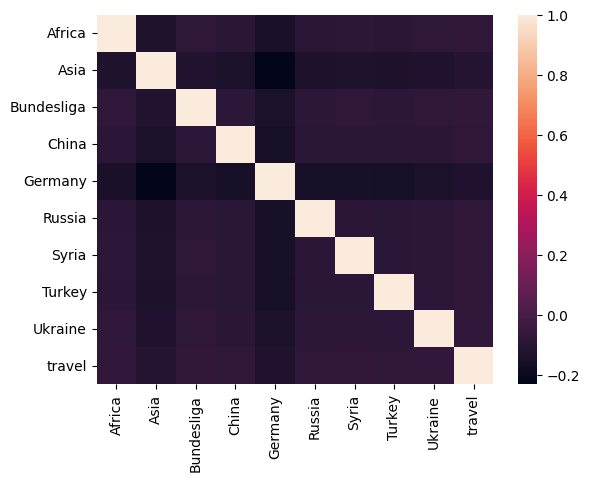

In [45]:
test_corr = df.loc[df['firstKeyword'].isin(df['firstKeyword'].value_counts().nlargest(10).index.tolist()),'firstKeyword'].copy()
test_corr = pd.get_dummies(test_corr)
sns.heatmap(test_corr.corr())

In [39]:
df['firstKeyword'].value_counts().nlargest(10).index.tolist()

['Germany',
 'Asia',
 'China',
 'Turkey',
 'Russia',
 'Syria',
 'Africa',
 'Ukraine',
 'Bundesliga',
 'travel']

In [43]:
df[df['firstKeyword'].isin(df['firstKeyword'].value_counts().nlargest(10).index.tolist())]

,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,keywordStrings,...,language,cleanFocusCategory,cleanRegions,firstContentAssociations,secondContentAssociations,thirdContentAssociations,fourthContentAssociations,firstKeyword,cleanLastModifiedDate,cleanGeographicLocations
9,16490848,China ejects New York Times journalist,China sends journalist home,<p>\n\tChina has started the new year by expel...,A New York Times journalist has been expelled ...,,None,[],"[{'name': 'China'}, {'name': 'Wen Jiabao'}, {'...","[China, Wen Jiabao, New York Times, journalist...",...,None,None,None,30422261,30422263.0,30422262.0,30422264.0,China,2013-01-01 15:53:27+00:00,None
34,16491771,Syria rebels step up attack on air base,Syria air base attack,<p>\n\tOpposition fighters had launched an ass...,Rebel fighters in Syria have intensified their...,,None,[],"[{'name': 'Syria'}, {'name': 'Taftanaz'}, {'na...","[Syria, Taftanaz, Syrian Observatory, al Nusra...",...,None,None,None,30423527,30423532.0,30423528.0,30423534.0,Syria,2013-01-02 12:17:15+00:00,None
38,16484380,"Africa's middle class prospers, but at a price",African prosperity,"<p>\n\tThere’s no doubt that ""Citizen Kofi"" is...","In Ghana, the middle class is growing fast. It...",Africa's growing middle class is a clear sign ...,None,[],"[{'name': 'Africa'}, {'name': 'income'}, {'nam...","[Africa, income, middle class, Ghana, South Af...",...,None,None,None,30415057,30415058.0,30415059.0,30415060.0,Africa,2013-01-02 13:05:30+00:00,None
48,16493374,German football fans halt silent protests,Fans end their silence,"<p>\n\tThe ""12:12"" protest movement issued a s...",A German soccer fans' union has called a halt ...,,None,[],"[{'name': 'Germany'}, {'name': 'Bundesliga'}, ...","[Germany, Bundesliga, fans, football, violence...",...,None,None,None,30424922,30424924.0,30424923.0,30424925.0,Germany,2013-01-02 19:35:28+00:00,None
65,15826880,Dusseldorf – with a Tourist from Italy,,,We accompany Roberto Strano for a sunny day ou...,,None,[],"[{'name': 'travel'}, {'name': 'discover german...","[travel, discover germany, düsseldorf, rhine e...",...,None,None,None,29736725,29736726.0,29736727.0,29736728.0,travel,2013-01-03 10:27:02+00:00,"[{'name': 'Düsseldorf, Deutschland'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175610,62307066,Russia tightens legislation on 'foreign agents',Russia tightens legislation on 'foreign agents',"<p>Russia's lower house of parliament, the Sta...",Russian lawmakers passed a law expanding the d...,Russia's Duma passed a law expanding the defin...,,[{'name': 'Russian Federation'}],"[{'name': 'Russia'}, {'name': 'foreign agents'...","[Russia, foreign agents, Russian foreign agent...",...,ENGLISH,Politics,Russian Federation,61625214,61625318.0,61625320.0,61625321.0,Russia,2022-06-29 16:34:19.261000+00:00,None
175628,62309716,Ukraine: Russia pulls back forces from Snake I...,Russia pulls back forces from Snake Island — a...,<ul>\n\t<li>Ukraine cuts ties with Syria over ...,"Russia claimed the move was a ""goodwill gestur...","Russia claims the move is a ""goodwill gesture""...",,"[{'name': 'Ukraine'}, {'name': 'Russian Federa...","[{'name': 'Ukraine'}, {'name': 'Russia'}, {'na...","[Ukraine, Russia, war, conflict, Mariupol, Amn...",...,ENGLISH,Conflicts,Ukraine,61628573,61628575.0,61628585.0,61628587.0,Ukraine,2022-07-01 04:12:59.628000+00:00,None
175631,62312133,South Korea's new space program reaches for th...,South Korea's new space program reaches for th...,"<p>The recent <a href=""/en/south-korea-success...",Seoul has announced significant financial supp...,Seoul has announced significant financial supp...,,"[{'name': 'South Korea'}, {'name': 'Asia'}]","[{'name': 'Asia'}, {'name': 'South Korea'}, {'...","[Asia, South Korea, aerospace, satellite launc...",...,ENGLISH,Technology,South Korea,61631104,61631276.0,61631277.0,61631278.0,Asia,2022-07-01 20:03:07.062000+00:00,None
175641,62315345,Germany unveils plans fo

In [52]:
df['keywordStrings'][0]

['DRC', 'M23', 'FDLR', 'Rwanda', 'Susan Rice', 'UN security council']

<AxesSubplot:xlabel='cleanLastModifiedDate'>

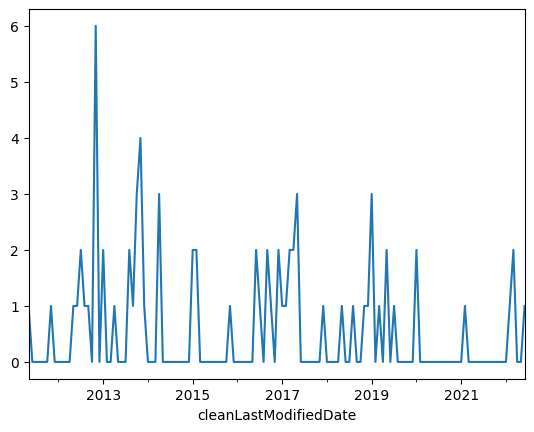

In [64]:
test3 = df.copy()
test3.set_index('cleanLastModifiedDate', inplace = True)
test3[test3['firstKeyword'] == test3['keywordStrings'][0][0]].resample('1M').count()['firstKeyword'].plot()

<AxesSubplot:xlabel='cleanLastModifiedDate'>

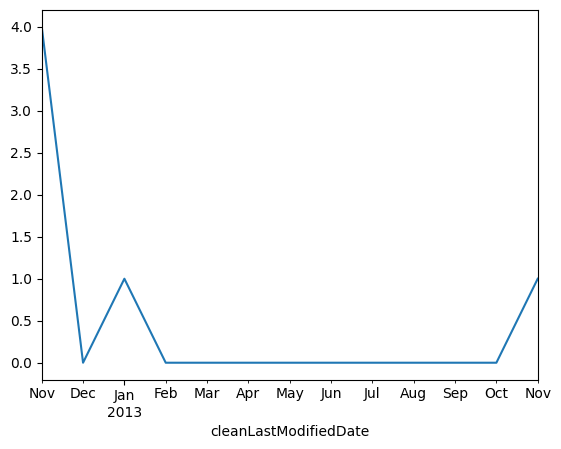

In [65]:
test3[(test3['firstKeyword'] == test3['keywordStrings'][0][0]) & (test3['secondKeyword'] == test3['keywordStrings'][0][1])].resample('1M').count()['firstKeyword'].plot()

<AxesSubplot:xlabel='cleanLastModifiedDate'>

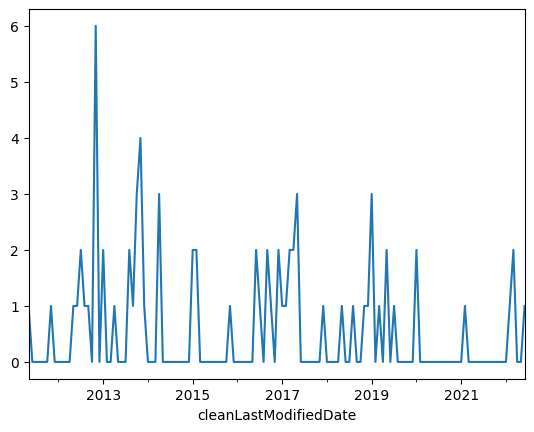

In [60]:
test3[test3['firstKeyword'] == 'DRC'].resample('1M').count()['firstKeyword'].plot()

In [61]:
test3['firstKeyword']

cleanLastModifiedDate
2013-01-01 03:05:32+00:00                    DRC
2013-01-01 03:05:37+00:00              telephone
2013-01-01 03:20:46+00:00           fiscal cliff
2013-01-01 07:18:21+00:00            Kim Jong Un
2013-01-01 07:32:48+00:00           fiscal cliff
                                        ...     
2022-07-01 04:58:32.754000+00:00          Turkey
2022-06-30 19:23:57.846000+00:00       pollution
2022-06-30 20:00:16.263000+00:00             war
2022-07-02 10:16:37.968000+00:00          France
2022-07-01 03:54:07.579000+00:00         Ecuador
Name: firstKeyword, Length: 175659, dtype: object

In [73]:
test3 = df.copy()
test3.set_index('cleanLastModifiedDate', inplace = True)
#test3[test3['firstKeyword'] == test3['keywordStrings'][0][0]].resample('1M').count()['firstKeyword'].plot()
print(test3[test3['keywordStrings'].apply(lambda x : x == test3['keywordStrings'][1])])


                                 id                                     name  \
cleanLastModifiedDate                                                          
2013-01-01 03:05:37+00:00  16489912  Catholic Church abuse hotline goes cold   

                             shortTitle  \
cleanLastModifiedDate                     
2013-01-01 03:05:37+00:00  Disconnected   

                                                                        text  \
cleanLastModifiedDate                                                          
2013-01-01 03:05:37+00:00  <p>\n\tFor two and a half years, the counselin...   

                                                                      teaser  \
cleanLastModifiedDate                                                          
2013-01-01 03:05:37+00:00  The Catholic Church in Germany has closed its ...   

                                                                 shortTeaser  \
cleanLastModifiedDate                                              

In [81]:
print(test3.groupby(test3['keywordStrings']).head())

                                        id  \
cleanLastModifiedDate                        
2013-01-01 03:05:32+00:00         16489913   
2013-01-01 03:05:37+00:00         16489912   
2013-01-01 03:20:46+00:00         16489903   
2013-01-01 07:18:21+00:00         16490025   
2013-01-01 07:32:48+00:00         16490029   
...                                    ...   
2022-06-20 14:20:55.192000+00:00  62193277   
2022-06-21 14:50:22.007000+00:00  62188520   
2022-06-24 09:25:29.344000+00:00  62237067   
2022-06-26 09:43:03.113000+00:00  62243627   
2022-07-07 09:03:32.425000+00:00  62237754   

                                                                               name  \
cleanLastModifiedDate                                                                 
2013-01-01 03:05:32+00:00                        UN imposes sanctions on DRC rebels   
2013-01-01 03:05:37+00:00                   Catholic Church abuse hotline goes cold   
2013-01-01 03:20:46+00:00         "Fiscal cliff" tax 

In [57]:
test3['keywordStrings']

cleanLastModifiedDate
2013-01-01 03:05:32+00:00           [DRC, M23, FDLR, Rwanda, Susan Rice, UN securi...
2013-01-01 03:05:37+00:00           [telephone, hotline, helpline, Catholic Church...
2013-01-01 03:20:46+00:00           [fiscal cliff, Obama, congress, spending cuts,...
2013-01-01 07:18:21+00:00           [Kim Jong Un, Kim Jong Il, Kim Il Sung, lee my...
2013-01-01 07:32:48+00:00           [fiscal cliff, US Senate, Senate vote, fiscal ...
                                                          ...                        
2022-07-01 04:58:32.754000+00:00    [Turkey, Recep Tayipp Erdogan, Finland Sweden,...
2022-06-30 19:23:57.846000+00:00     [pollution, gold mine, Turkey, Anagold, cyanide]
2022-06-30 20:00:16.263000+00:00    [war, Ukraine, Russia, Russian attack, soldier...
2022-07-02 10:16:37.968000+00:00                 [France, vegetarian, steak, sausage]
2022-07-01 03:54:07.579000+00:00                                  [Ecuador, protests]
Name: keywordStrings, Length: 17

In [68]:
test3['keywordStrings'].str[0]

cleanLastModifiedDate
2013-01-01 03:05:32+00:00                    DRC
2013-01-01 03:05:37+00:00              telephone
2013-01-01 03:20:46+00:00           fiscal cliff
2013-01-01 07:18:21+00:00            Kim Jong Un
2013-01-01 07:32:48+00:00           fiscal cliff
                                        ...     
2022-07-01 04:58:32.754000+00:00          Turkey
2022-06-30 19:23:57.846000+00:00       pollution
2022-06-30 20:00:16.263000+00:00             war
2022-07-02 10:16:37.968000+00:00          France
2022-07-01 03:54:07.579000+00:00         Ecuador
Name: keywordStrings, Length: 175659, dtype: object